In [1]:
# USER: Change the path below to point to your local copy of ImageD11:

import os

home_dir = !echo $HOME
home_dir = str(home_dir[0])

# USER: You can change this location if you want

id11_code_path = os.path.join(home_dir, "Code/ImageD11")

import sys

sys.path.insert(0, id11_code_path)

os.environ['OMP_NUM_THREADS']='1'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib ipympl

import ImageD11.sinograms.point_by_point
import ImageD11.sinograms.dataset
import ImageD11.sinograms.properties
import ImageD11.columnfile

import ImageD11.nbGui.nb_utils as utils

ImportError: cannot import name 'dtymask' from 'ImageD11.sinograms.geometry' (/home/esrf/james1997a/Code/ImageD11/ImageD11/sinograms/geometry.py)

In [ ]:
# NOTE: For old datasets before the new directory layout structure, we don't distinguish between RAW_DATA and PROCESSED_DATA

### USER: specify your experimental directory

rawdata_path = "/data/visitor/ihma439/id11/20231211/RAW_DATA"

!ls -lrt {rawdata_path}

### USER: specify where you want your processed data to go

processed_data_root_dir = "/data/visitor/ihma439/id11/20231211/PROCESSED_DATA/James/nb_testing"

In [ ]:
# USER: pick a sample and a dataset you want to segment

sample = "FeAu_0p5_tR_nscope"
dataset = "top_100um"

In [ ]:
# desination of H5 files

dset_file = os.path.join(processed_data_root_dir, sample, f"{sample}_{dataset}", f"{sample}_{dataset}_dataset.h5")

In [ ]:
# load the dataset from file

ds = ImageD11.sinograms.dataset.load(dset_file)

print(ds)
print(ds.shape)

In [ ]:
# This assumes you've only just segmented, so we need to add these things to the dataset:

# USER: specify the path to the parameter file

par_file = os.path.join(processed_data_root_dir, '../../../SCRIPTS/James/S3DXRD/Fe_refined.par')
e2dx_file = os.path.join(processed_data_root_dir, '../../CeO2/e2dx_E-08-0173_20231127.edf')
e2dy_file = os.path.join(processed_data_root_dir, '../../CeO2/e2dy_E-08-0173_20231127.edf')

# add them to the dataset

ds.parfile = par_file
ds.e2dxfile = e2dx_file
ds.e2dyfile = e2dy_file

In [3]:
# Import the 2D columnfile, or make it if it doesn't exist

if os.path.exists(ds.col2dfile):
    cf_2d = ds.get_cf_2d_from_disk()
    cf_2d.parameters.loadparameters(ds.parfile)
    cf_2d.updateGeometry()
else:
    cf_2d = ds.get_cf_2d()

    # save the 2D peaks to file so we don't have to spatially correct them again
    ImageD11.columnfile.colfile_to_hdf(cf_2d, ds.col2dfile)

NameError: name 'ds' is not defined

In [4]:
# filter the columnfile to discard weak peaks

cf_2d.filter(cf_2d.Number_of_pixels > 5)

NameError: name 'cf_2d' is not defined

In [5]:
pbp_object = ImageD11.sinograms.point_by_point.PBP(ds.parfile,
                                                    ds,
                                                    hkl_tol=0.01,
                                                    fpks=0.9,
                                                    ds_tol=0.005,
                                                    etacut=0.1,
                                                    ifrac=1./300,
                                                    cosine_tol=np.cos(np.radians(90 - 0.25)),
                                                    y0=-15.985,
                                                    symmetry="cubic",
                                                    foridx=[0, 1, 2, 3, 4],
                                                    forgen=[0, 1],
                                                    uniqcut=0.9)

NameError: name 'ImageD11' is not defined

In [11]:
pbp_object.setpeaks(cf_2d)

0 0.4929 (1, 0, -1) 12 255079 used, sum_intensity> 703.2633333333334
1 0.6971 (2, 0, 0) 6 96992 used, sum_intensity> 621.9300000000001
2 0.8538 (2, 1, -1) 24 282191 used, sum_intensity> 515.2433333333333
3 0.9859 (2, 0, -2) 12 139617 used, sum_intensity> 343.64000000000004
4 1.1022 (3, 1, 0) 24 288428 used, sum_intensity> 281.86333333333334
5 1.2074 (2, 2, -2) 8 skipped
6 1.3042 (2, -3, 1) 48 skipped
7 1.3942 (4, 0, 0) 6 skipped
8 1.4788 (4, 1, 1) 36 skipped
9 1.5588 (4, 2, 0) 24 skipped
10 1.6349 (3, 3, 2) 24 skipped
11 1.7076 (4, 2, -2) 24 skipped
12 1.7773 (3, 1, -4) 72 skipped
13 1.9091 (5, 1, 2) 48 skipped
14 1.9717 (4, 0, -4) 12 skipped
15 2.0324 (5, 0, -3) 48 skipped
16 2.0913 (4, -4, 2) 30 skipped
17 2.1486 (5, -3, 2) 72 skipped
18 2.2044 (6, 2, 0) 24 skipped
Using for indexing: 1062307 npks, minpks, forgen 78 70 [0, 1]


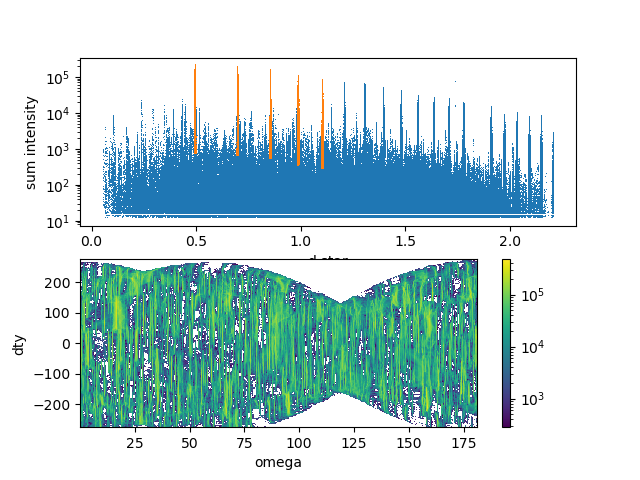

In [12]:
fig, ax = pbp_object.iplot()

In [13]:
ds.pbpfile = os.path.join(ds.analysispath, ds.dsname + '_pbp_index.pbp')

In [14]:
pbp_object.point_by_point(ds.pbpfile, loglevel=3)

{'cosine_tol': 0.004363309284746583,
 'ds_tol': 0.005,
 'forgen': [0, 1],
 'hkl_tol': 0.01,
 'hmax': 6,
 'minpks': 70,
 'ny': 275,
 'uniqcut': 0.9,
 'y0': -15.985,
 'ymin': -274.00012223777037,
 'ystep': 2.000000892246499}


/home/esrf/james1997a/Code/ImageD11/ImageD11/indexing.py:1127: RuntimeWarning: invalid value encountered in scalar divide
  self.fitlastrefined = math.sqrt(np.sum(contribs) / contribs.shape[0])


/home/esrf/james1997a/Code/ImageD11/ImageD11/indexing.py:1127: RuntimeWarning: invalid value encountered in scalar divide
  self.fitlastrefined = math.sqrt(np.sum(contribs) / contribs.shape[0])


/home/esrf/james1997a/Code/ImageD11/ImageD11/indexing.py:1127: RuntimeWarning: invalid value encountered in scalar divide
  self.fitlastrefined = math.sqrt(np.sum(contribs) / contribs.shape[0])


/home/esrf/james1997a/Code/ImageD11/ImageD11/indexing.py:1127: RuntimeWarning: invalid value encountered in scalar divide
  self.fitlastrefined = math.sqrt(np.sum(contribs) / contribs.shape[0])


/home/esrf/james1997a/Code/ImageD11/ImageD11/indexing.py:1127: RuntimeWarning: invalid value encountered in scalar divide
  self.fitlastrefined = math.sqrt(np.sum(contribs) / contribs.shape[0])


/home/esrf/james1997a/Code/ImageD11/ImageD11/indexing.py:1127: RuntimeWarning: invalid value encountered in scalar divide
  self.fitlastrefined = math.sqrt(np.sum(contribs) / contribs.shape[0])


/home/esrf/james1997a/Code/ImageD11/ImageD11/indexing.py:1127: RuntimeWarning: invalid value encountered in scalar divide
  self.fitlastrefined = math.sqrt(np.sum(contribs) / contribs.shape[0])


/home/esrf/james1997a/Code/ImageD11/ImageD11/indexing.py:1127: RuntimeWarning: invalid value encountered in scalar divide
  self.fitlastrefined = math.sqrt(np.sum(contribs) / contribs.shape[0])


/home/esrf/james1997a/Code/ImageD11/ImageD11/indexing.py:1127: RuntimeWarning: invalid value encountered in scalar divide
  self.fitlastrefined = math.sqrt(np.sum(contribs) / contribs.shape[0])


240.84224653244019 seconds 0.0031616552002263205 s per point total 240.4 /s
240.6330692768097 seconds 0.0031589092270112593 s per point without setup


In [16]:
ds.save()